In [1]:
import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import plotly.express as px
%run data_cleaning.ipynb

centroid_locations = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 499/trio-capstone/data/CensusTractCentroids.csv")
metro_locations = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 499/trio-capstone/data/MetroLinkStations_REGISTERED.csv")
north_south_locations = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 499/trio-capstone/data/MetroLinkStations_NS.csv")
census_data = data = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 499/trio-capstone/data/B08119_stl_city.csv")
race_data = pd.read_csv("/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 499/trio-capstone/data/B08105_stl_city.csv")

In [2]:
by_tract = clean(census_data, race_data)
centroid_locations_small = centroid_locations[['NAMELSAD','INTPTLAT','INTPTLON']]
centroid_locations_small = centroid_locations_small.rename(columns = {"NAMELSAD": "location", "INTPTLAT" : "LAT", "INTPTLON" : "LON"})
full_data = by_tract.merge(centroid_locations_small, on='location')

In [3]:
lat_bounds = (min(full_data['LAT']),max(full_data['LAT']))
lon_bounds = (min(full_data['LON']),max(full_data['LON']))
full_data

,location,estimate,transit weight,income weight,race weight,node id,LAT,LON
0,Census Tract 1011,1039,0.003440,0.009653,0.007003,1011,38.554718,-90.273620
1,Census Tract 1012,1921,0.000660,0.009570,0.007421,1012,38.561824,-90.274863
2,Census Tract 1013,2161,0.001867,0.009560,0.007639,1013,38.566560,-90.264211
3,Census Tract 1014,1502,0.007292,0.009614,0.008835,1014,38.562243,-90.253522
4,Census Tract 1015,1318,0.002799,0.009645,0.007579,1015,38.548544,-90.264511
...,...,...,...,...,...,...,...,...
99,Census Tract 1274,2369,0.010367,0.009556,0.009101,1274,38.620159,-90.206053
100,Census Tract 1275,931,0.009164,0.009648,0.008966,1275,38.637493,-90.210272
101,Census Tract 1276,1683,0.001439,0.009568,0.007141,1276,38.603873,-90.199501
102,Census Tract 1277,832,0.023697,0.009668,0.012756,1277,38.652853,-90.228653


In [ ]:
def dist_to_nearest_stop_eval1(centroid_locations, metro_locations):
    shortest_distance = np.zeros(len(centroid_locations))
    
    for i in range(len(centroid_locations)):
        cent = np.array([centroid_locations.INTPTLAT[i],centroid_locations.INTPTLON[i]])
        closest_distance = float('inf') # initialize to infinity
        for j in range(len(metro_locations)):
            metro = np.array([metro_locations[j][1],metro_locations[j][0]])
            diff_latlon = cent-metro
            diff_miles = np.copy(diff_latlon)
            diff_miles[0] = 69*diff_latlon[0]
            diff_miles[1] = 54.6*diff_latlon[1]
            distance = np.linalg.norm(diff_miles)
            if (distance < closest_distance):
                closest_distance = distance
        shortest_distance[i] = closest_distance
    
    return np.sum(shortest_distance)/len(shortest_distance)


def dist_to_nearest_stop_eval2(centroid_locations, metro_locations):
    shortest_distance = np.zeros(len(centroid_locations))
    
    for i in range(len(centroid_locations)):
        cent = np.array([centroid_locations.INTPTLAT[i],centroid_locations.INTPTLON[i]])
        closest_distance = float('inf') # initialize to infinity
        for j in range(len(metro_locations)):
            metro = np.array([metro_locations[j][1],metro_locations[j][0]])
            diff_latlon = cent-metro
            diff_miles = np.copy(diff_latlon)
            diff_miles[0] = 69*diff_latlon[0]
            diff_miles[1] = 54.6*diff_latlon[1]
            distance = np.linalg.norm(diff_miles)
            if (distance < closest_distance):
                closest_distance = distance
        shortest_distance[i] = closest_distance
    
    return np.dot(shortest_distance, full_data['transit weight'])


def dist_to_nearest_stop_eval3(centroid_locations, metro_locations):
    shortest_distance = np.zeros(len(centroid_locations))
    
    for i in range(len(centroid_locations)):
        cent = np.array([centroid_locations.INTPTLAT[i],centroid_locations.INTPTLON[i]])
        closest_distance = float('inf') # initialize to infinity
        for j in range(len(metro_locations)):
            metro = np.array([metro_locations[j][1],metro_locations[j][0]])
            diff_latlon = cent-metro
            diff_miles = np.copy(diff_latlon)
            diff_miles[0] = 69*diff_latlon[0]
            diff_miles[1] = 54.6*diff_latlon[1]
            distance = np.linalg.norm(diff_miles)
            if (distance < closest_distance):
                closest_distance = distance
        shortest_distance[i] = closest_distance
    
    return np.dot(shortest_distance, full_data['income weight'])


def dist_to_nearest_stop_eval4(centroid_locations, metro_locations):
    shortest_distance = np.zeros(len(centroid_locations))
    
    for i in range(len(centroid_locations)):
        cent = np.array([centroid_locations.INTPTLAT[i],centroid_locations.INTPTLON[i]])
        closest_distance = float('inf') # initialize to infinity
        for j in range(len(metro_locations)):
            metro = np.array([metro_locations[j][1],metro_locations[j][0]])
            diff_latlon = cent-metro
            diff_miles = np.copy(diff_latlon)
            diff_miles[0] = 69*diff_latlon[0]
            diff_miles[1] = 54.6*diff_latlon[1]
            distance = np.linalg.norm(diff_miles)
            if (distance < closest_distance):
                closest_distance = distance
        shortest_distance[i] = closest_distance
    
    return np.dot(shortest_distance, full_data['race weight'])

ensemble_size = 1000000
num_stops = 12 #number of proposed north-south stops
eval_metric1 = np.zeros(ensemble_size)
eval_metric2 = np.zeros(ensemble_size)
eval_metric3 = np.zeros(ensemble_size)
eval_metric4 = np.zeros(ensemble_size)
rand_metros = np.zeros([num_stops,2])

for i in range(ensemble_size):
    for j in range(num_stops):
        rand_metros[j,0] = random.uniform(lon_bounds[0], lon_bounds[1])
        rand_metros[j,1] = random.uniform(lat_bounds[0], lat_bounds[1])
    
    eval_metric1[i] = dist_to_nearest_stop_eval1(centroid_locations, rand_metros)
    eval_metric2[i] = dist_to_nearest_stop_eval2(centroid_locations, rand_metros)
    eval_metric3[i] = dist_to_nearest_stop_eval3(centroid_locations, rand_metros)
    eval_metric4[i] = dist_to_nearest_stop_eval4(centroid_locations, rand_metros)
    
    

In [ ]:
plt.hist(eval_metric1[eval_metric1 != 0], bins = 1000, density = True)
plt.title("Distribution of Distance to Nearest Stop Metric for Randomly Assigned Metro Stops")

In [ ]:
len(eval_metric1[eval_metric1 != 0])

In [ ]:
plt.hist2d(eval_metric1[eval_metric1 != 0], eval_metric2[eval_metric2 != 0], bins=(100, 100), cmap=plt.cm.jet, density = True)
plt.colorbar(label='Density')
plt.xlabel('Unweighted')
plt.ylabel('Transit')
plt.title('2D Histogram')

# Overlay the line y = x
plt.plot([-3, 3], [-3, 3], 'w--')  # Plotting y = x line (from -3 to 3)

plt.show()

In [ ]:
cluster_centroids = pd.DataFrame(data = rand_metros, columns = ["long", "lat"])
cluster_centroids['size'] = [1 for i in range(len(cluster_centroids))]

fig = px.scatter_mapbox(cluster_centroids,
                        lat='lat',
                        lon='long',
                        size='size',
                        size_max=15,
                        zoom=10,
                        height=750)
fig.update_layout(mapbox_style="open-street-map")

Text(0.5, 1.0, 'Distribution of Distance to Nearest Stop Metric for Randomly Assigned Metro Stops with Fixed Longitude')

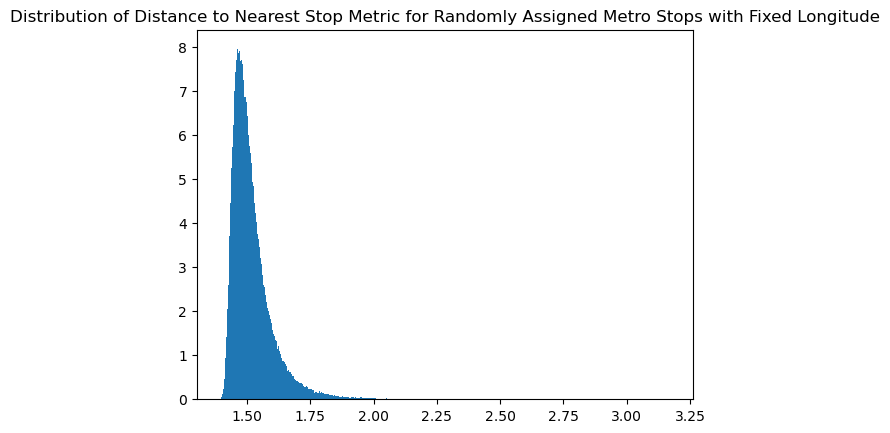

In [5]:
def dist_to_nearest_stop_eval(centroid_locations, metro_locations):
    shortest_distance = np.zeros(len(centroid_locations))
    
    for i in range(len(centroid_locations)):
        cent = np.array([centroid_locations.INTPTLAT[i],centroid_locations.INTPTLON[i]])
        closest_distance = float('inf') # initialize to infinity
        for j in range(len(metro_locations)):
            metro = np.array([metro_locations[j][1],metro_locations[j][0]])
            diff_latlon = cent-metro
            diff_miles = np.copy(diff_latlon)
            diff_miles[0] = 69*diff_latlon[0]
            diff_miles[1] = 54.6*diff_latlon[1]
            distance = np.linalg.norm(diff_miles)
            if (distance < closest_distance):
                closest_distance = distance
        shortest_distance[i] = closest_distance
    
    return np.sum(shortest_distance)/len(shortest_distance)

ensemble_size = 500000
num_stops = 12 #number of proposed north-south stops
eval_metric = np.zeros(ensemble_size)
rand_metros = np.zeros([num_stops,2])

for i in range(ensemble_size):
    for j in range(num_stops):
        rand_metros[j,0] = np.mean([lon_bounds[0], lon_bounds[1]])
        rand_metros[j,1] = random.uniform(lat_bounds[0], lat_bounds[1])
    
    eval_metric[i] = dist_to_nearest_stop_eval(centroid_locations, rand_metros)
    
plt.hist(eval_metric[eval_metric != 0], bins = 1000, density = True)
plt.title("Distribution of Distance to Nearest Stop Metric for Randomly Assigned Metro Stops with Fixed Longitude")

In [ ]:
chicago = np.array([41.8781, 87.6298]) #should be lattitude and then longitude
stl = np.array([38.6270, 90.1994])

test = chicago - stl
print(test)
test1 = np.copy(test)
test1[0] = test[0]*69
test1[1] = test[0]*54.6
print(test)
np.linalg.norm(test1)

Text(0.5, 1.0, 'Distribution with Fixed Longitude in St. Louis Center')

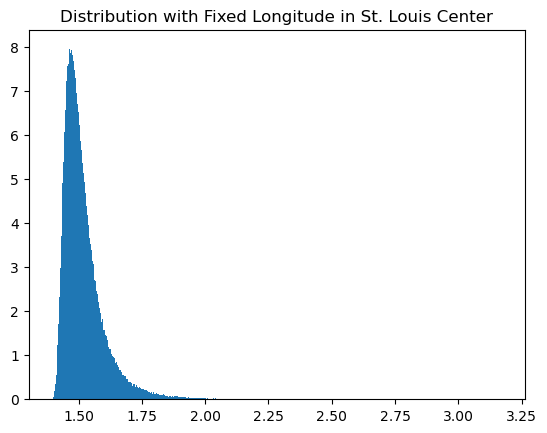

In [6]:
plt.hist(eval_metric[eval_metric != 0], bins = 1000, density = True)
plt.title("Distribution with Fixed Longitude in St. Louis Center")